<img src="./Logo_UNSAM.png" align="right" width="150" />

#### Procesamiento Digital de Señales
# Trabajo Práctico Nº4
#### Lucas Marú

# Enunciado

## Primeras nociones de estimación espectral.


Para una señal 

$$
x(m) = a_1 \cdot \sin(\Omega_1 \cdot m) + n(m)
$$

siendo 

$$
\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}, \quad \text{con } \Omega_0 = \frac{\pi}{2}
$$

y las variables aleatorias definidas por:

$$
f_r \sim \mathcal{U}\left(-\tfrac{1}{2}, \tfrac{1}{2} \right), \quad
n(m) \sim \mathcal{N}(0, \sigma^2)
$$

---

Se pide evaluar los siguientes estimadores de $a_1$ y $\Omega_1$:

- Estimador de amplitud:
  $$
  \hat{a}_1 = \left| X_w(\Omega_0) \right| = \left| \mathcal{F}\{x(m) \cdot w_i(m)\} \right|
  $$

- Estimador de frecuencia:
  $$
  \hat{\Omega}_1 = \underset{f}{\arg\max} \ \hat{P}(f)
  $$

---

### Consignas:

- Considere **200 realizaciones** de **1000 muestras** cada una
- Parametrice para **SNR = 3 dB** y **SNR = 10 dB**



### Introducción: 

La estimación espectral es una técnica utilizada en el procesamiento de señales para determinar cómo se distribuye la potencia de una señal en función de la frecuencia.  
Cuando una señal no es puramente periódica (por ejemplo, una onda senoidal), sino que contiene componentes aleatorios o ruidosos (como una grabación de voz, una señal eléctrica o una medición física), no es posible simplemente aplicar una transformada de Fourier y esperar un resultado limpio. La estimación espectral permite abordar este análisis de manera más robusta.

En el experimento propuesto, la señal considerada es una senoidal a la que se le adicionan componentes estocásticas tanto en frecuencia como en amplitud. La frecuencia de la señal está dada por:

$$
\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}
\$$

donde $\Omega_0 = \frac{\pi}{2}$ es la frecuencia central (mitad de banda digital) y $f_r$ es una variable aleatoria distribuida uniformemente en el intervalo $\left( -\frac{1}{2}, \frac{1}{2} \right)$.  
Esta formulación introduce una **desintonía aleatoria**, acotada a un máximo de medio bin hacia la izquierda o hacia la derecha respecto al centro de banda digital, lo que implica que cada realización de la señal tendrá una frecuencia levemente distinta.  

Además, se suma una componente de ruido blanco gaussiano aditivo, modelado como una variable aleatoria con distribución normal de media cero y varianza $\sigma^2$. Estas dos fuentes de aleatoriedad convierten a la señal en un proceso adecuado para el análisis mediante técnicas de estimación espectral.

Por último las prescripciones de SNR buscan una realización para una señal más limpia (ratio=10) y otra más ruidosa (ratio=3): 

$$SNR_{dB}=\frac{P_{señal}}{P_{ruido}}=10 \cdot \log_{10} \left( \frac{P_{\text{señal}}}{P_{\text{ruido}}} \right)$$

Asumiendo una potencia normalizada para nuestra señal, estos ratios nos indican la potencia que el ruido debe tener para cumplir con las prescripciones: 

$$ \text{POT}_{\text{noise}} = 10^{\frac{-\text{SNR}_{\text{dB}}}{10}}$$ 

Remplazando por 10  o 3 el código ajusta automáticamente la señal a uno u otro SNR.

### Se pide:

1) Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere.

Para poder cumplir la consigna se desarrollo el siguiente código en python:

<>:291: SyntaxWarning: invalid escape sequence '\h'
<>:334: SyntaxWarning: invalid escape sequence '\h'
<>:405: SyntaxWarning: invalid escape sequence '\h'
<>:416: SyntaxWarning: invalid escape sequence '\h'
<>:291: SyntaxWarning: invalid escape sequence '\h'
<>:334: SyntaxWarning: invalid escape sequence '\h'
<>:405: SyntaxWarning: invalid escape sequence '\h'
<>:416: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_6152/2315050160.py:291: SyntaxWarning: invalid escape sequence '\h'
  axs[-1].set_xlabel("Estimador $\hat{{a}}_1$")
/tmp/ipykernel_6152/2315050160.py:334: SyntaxWarning: invalid escape sequence '\h'
  axs[-1].set_xlabel("Estimador $\hat{{\omega}}_1$")
/tmp/ipykernel_6152/2315050160.py:405: SyntaxWarning: invalid escape sequence '\h'
  ax1.set_title("Sesgo, Varianza y MSE para $\hat{a}_1$")
/tmp/ipykernel_6152/2315050160.py:416: SyntaxWarning: invalid escape sequence '\h'
  ax2.set_title("Sesgo, Varianza y MSE para $\hat{\Omega}_1$")


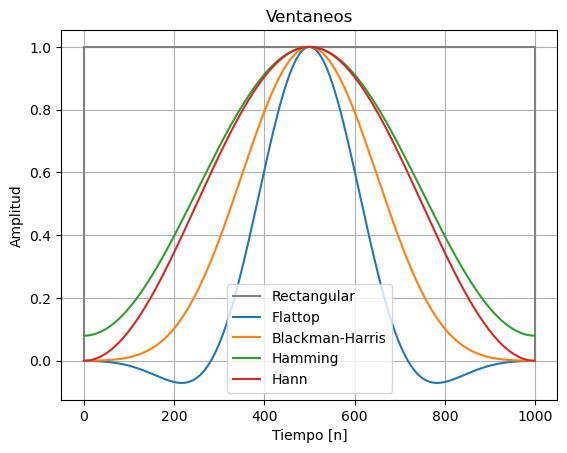

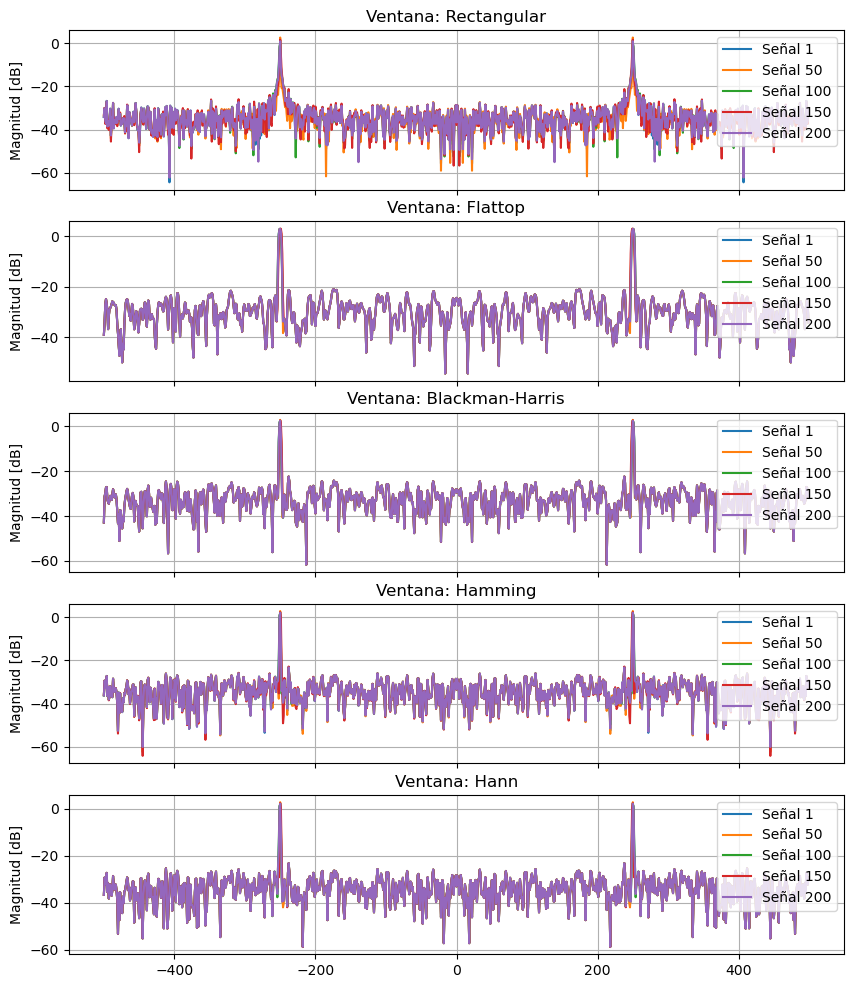

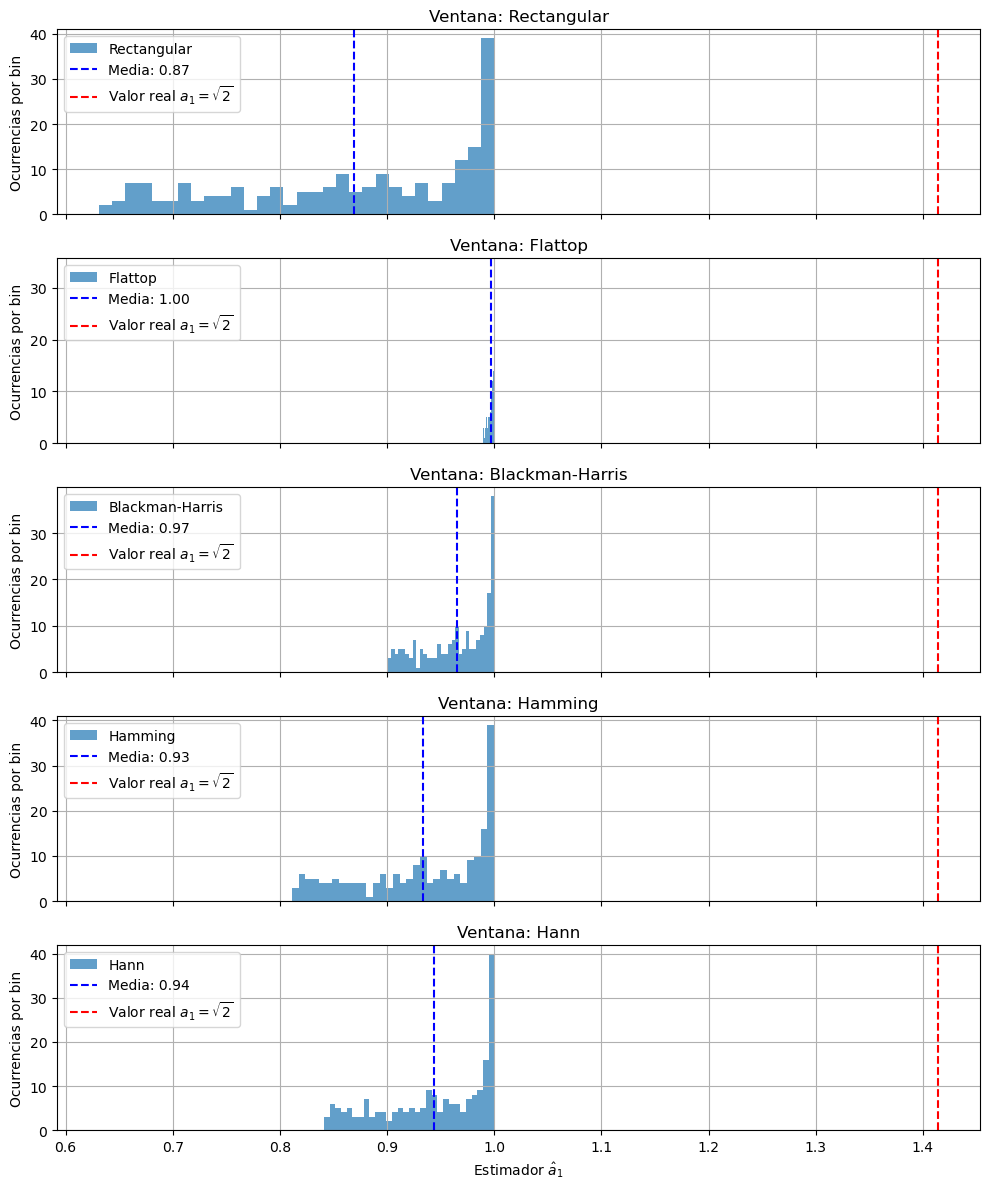

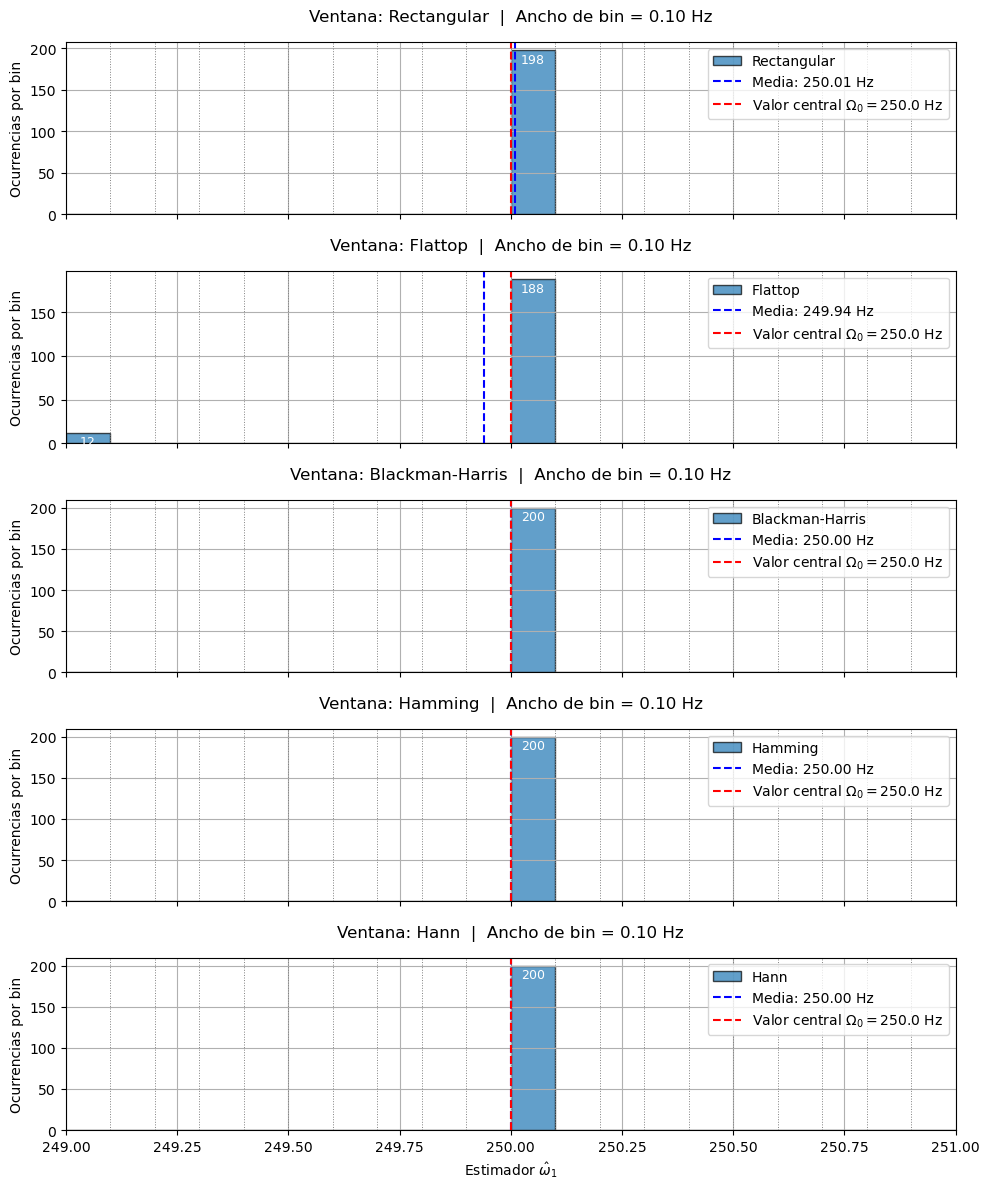

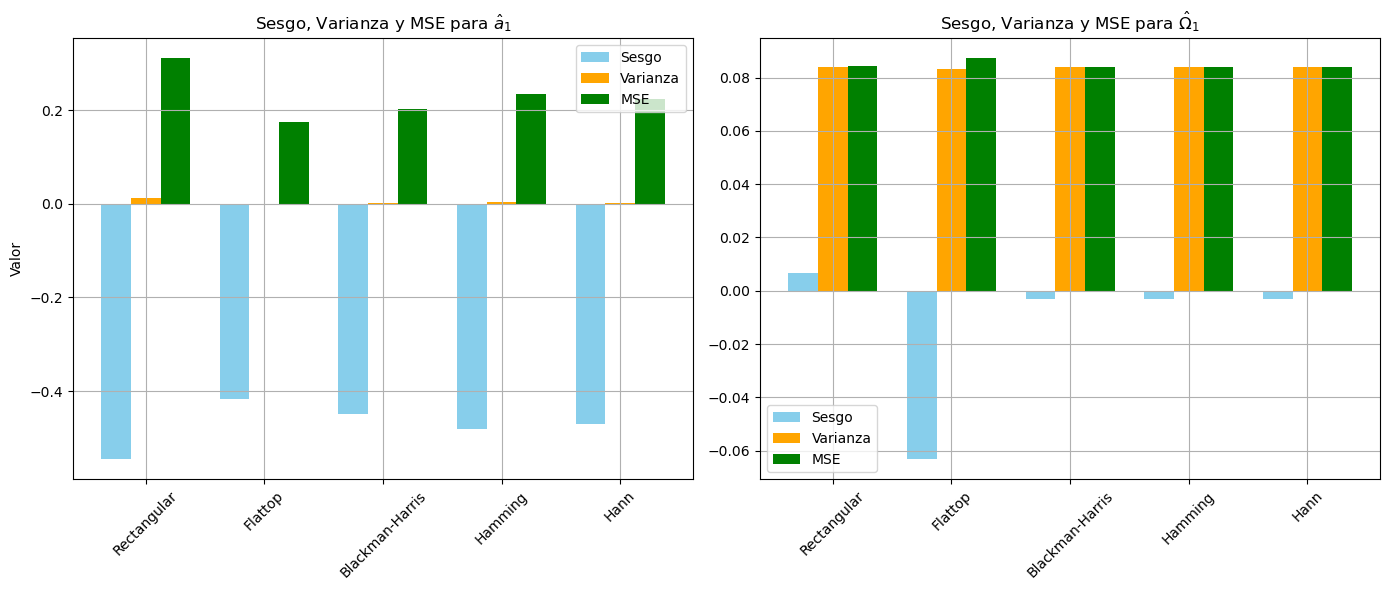

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  9 18:44:34 2025

@author: lmaru"""

#%% Consigna

"""Para una señal x(k)=a1⋅sen(Ω1⋅k)+n(k) siendo Ω1=Ω0+fr⋅2πN, con Ω0=π2 y las variables aleatorias definidas por
   fr∼U(−1/2,1/2) (uniforme) y n∼N(0,σ2) (normal). 
   Evalúe los siguientes estimadores de a1 y Ω1: 
                                     a1^^=|Xiw(Ω)|=|F{x(k)⋅wi(k)}| y Ω^1=arg maxf{P^}
   Siguiendo las siguientes consignas:
       .Considere 200 realizaciones de 1000 muestras para cada experimento.
       .Parametrice para SNR's de 3 y 10 db.
                                 
"""
"""
TAREA SEMANAL 4 - Primeras nociones de la estimacion espectral
La estimación espectral es una técnica utilizada en el procesamiento de señales para determinar cómo se
distribuye la potencia de una señal en función de la frecuencia.
Cuando una señal no es puramente periódica (por ejemplo, una onda senoidal), sino que contiene componentes 
aleatorios o ruidosos (como una grabación de voz, una señal eléctrica, o una medición física), no es posible 
simplemente aplicar una transformada de Fourier y esperar un resultado limpio. La estimación espectral permite 
hacer esto de forma más robusta.
"""
mostrar_graficos = True
#%% módulos y funciones a importar
import numpy as np
np.random.seed(52)  # Fijamos la semilla para resultados reproducibles
from scipy.signal.windows import hamming, hann, blackmanharris, flattop
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
#%% Datos de la simulacion

fs = 1000.0           # frecuencia de muestreo (Hz)
N = 1000            # cantidad de muestras
ts = 1/fs           # tiempo de muestreo
df = fs/N           # resolución espectral

N_Test = 200        # Numero de pruebas

SNR = 10            # Signal to Noise Ratio 
 
"""De la definición de SNR y asumiendo potencia de la señal normalizada llego 
al valor que debe tener la potencia de ruido para respetar el SNR requerido.
De esta manera tengo resuelta la experiencia para ambas SNR prescriptas."""
Sigma2 = 10**(-10/SNR) #Potencia de ruido

Omega_0 = fs/4      # Nos ponemos a mitad de banda digital
"""Esto viene prescripto en el enunciado y tiene la intención de generar
frecuencias que oscilen +- medio bin del centro de banda digital."""
#%% Genero mi matriz de 1000x200 de la senoidal

"""Defino la amplitud que ya calculamos en otras TS para que la potencia de las
200 senoidales quede normalizada"""
A1 = np.sqrt(2) 

"""Genero el vector de 1x200 frecuencias, 200 valores extraidos de una 
distribución uniforme de -1,2 a 1/2 y le fuerzo las dimensiones con reshape"""
fr = np.random.uniform(-1/2,1/2,N_Test).reshape(1,N_Test)
  
Omega_1 = Omega_0 + fr*df                       # Genero mi Omega_1 de 1x200

# Genero vector de tiempo para meterlo como mi matriz de 1000x200 en el seno 
tt = np.linspace(0, (N-1)*ts, N).reshape(N,1)    #vector columna de 1000x1
tt = np.tile(tt, (1, N_Test))  # tile repite esa columna 200 veces, queda de 1000x200

""" Al mutiplicar omega_1 con tt numpy por defecto multiplica término a término
como tt es de 1000x200 entiende que tiene que expandir dimensionalmente a 
omega_1 para poder hacer el producto término a término, lo hace automáticamente
y por eso S es de 1000x200 
"""
S = A1 * np.sin(2 * np.pi * Omega_1 * tt)

"""Grafico la columna 0 del tiempo y la columna cero de S, para corroborar que 
tengo una senoidal pura de una frecuenia de alrededor de 250hz en cada columa, 
pero en cambio veo algo como una envolvente que módula la señal,pero si pongo 
omega_0=1 veo lo que espero ver"""
############################GRAFICO DE CHEQUEO#################################
# if mostrar_graficos:
#     plt.figure(1)
#     plt.plot(tt[:,0], S[:,0:5])  # ahora sí, una senoidal limpia
#     #plt.stem(tt[:,0], S[:,0],basefmt=" ")
#     plt.xlabel("Tiempo [s]")
#     plt.ylabel("Amplitud")
#     plt.title("Senoidal número 1")
#     plt.grid(True)
#     plt.show()
#%% Genero el ruido para la señal
# Para poder general la señal de ruido, tenemos que tener una distribucion normal con un N(o,sigma)

Media = 0                   # Media
SD_Sigma = np.sqrt(Sigma2)  # Desvio standar a partir de la pot calculada antes 

nn = np.random.normal(Media, SD_Sigma, N).reshape(N,1)  # Genero señal de ruido 1000x1
nn = np.tile(nn, (1,N_Test))                            # tile repite esa columna 200 veces, queda de 1000x200


#%% Sumo la matriz de senoidales con el ruido
Signal = S + nn
"""Grafico la columna 0 del tiempo y la columna cero de Signal, para corroborar 
que se haya añadido el ruido. Se ve el ruido, pero con el mismo patrón que cuando 
grafique la senoidal pura, se ve como una envolvente que módula la señal, 
nuevamente si cambio a omega_0=1 veo algo más razonable"""
############################GRAFICO DE CHEQUEO#################################
# if mostrar_graficos:
#     plt.figure(1)
#     plt.plot(tt[:,0], Signal[:,0:5])  # ahora sí, una senoidal limpia
#     plt.xlabel("Tiempo [s]")
#     plt.ylabel("Amplitud")
#     plt.title("Senoidal + ruido")
#     plt.grid(True)

#%% Calcular la FFT de cada señal en la matriz Signal

XF = fft(Signal, axis=0)  # FFT en cada columna (cada señal) eso lo garantizo con el axis
XF = fftshift(XF, axes=0) # Centramos el espectro, ahora axes garantiza el reordenamiento vertical
XF_norm = XF/np.max(np.abs(XF)) #normalizo
frec = np.arange(-fs/2, fs/2, df)  # Eje de frec apropiado para el orden que impone fftshift

#%% Graficamos la magnitud de la FFT para algunas señales
# if mostrar_graficos:
#     for i in range(5): #no encuentro otra manera de poner las etiquetas sin el for
#         plt.plot(frec, 10 * np.log10(2 * np.abs(XF_norm[:, i])**2), label=f'Señal {i+1}')
        
#     plt.xlabel("Frecuencia (Hz)")
#     plt.ylabel("Magnitud (dB)") 
#     plt.title("FFT de varias señales")
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#%% Genero las ventanas flattop, blackmanharris, hamming y hann
w_rect = np.ones((N,1))  # Ventana rectangular explícitada
w_flattop = flattop(N).reshape(N,1)
w_blackmanharris = blackmanharris(N).reshape(N,1)
w_hamming = hamming(N).reshape(N,1)
w_hann = hann(N).reshape(N,1)

# Graficar ventanas
n=np.arange(N)
if mostrar_graficos:
    plt.figure(2)
    plt.plot(n, w_rect, color='gray' ,label='Rectangular')
    plt.vlines(x=0, ymin=0, ymax=1, color='gray')
    plt.vlines(x=N-1, ymin=0, ymax=1, color='gray')
    plt.plot(n, w_flattop, label='Flattop')
    plt.plot(n, w_blackmanharris, label='Blackman-Harris')
    plt.plot(n, w_hamming, label='Hamming')
    plt.plot(n, w_hann, label='Hann')
    plt.title('Ventaneos')
    plt.xlabel('Tiempo [n]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
#%% Enventaneo la señal

W_Flattop = Signal *w_flattop
W_Flattop = fft(W_Flattop , axis=0)
W_Flattop = fftshift(W_Flattop , axes=0)  # Centramos el espectro
W_Flattop_norm = W_Flattop / np.max(np.abs(W_Flattop))


W_Blackmanharris = Signal *w_blackmanharris
W_Blackmanharris = fft(W_Blackmanharris , axis=0)
W_Blackmanharris = fftshift(W_Blackmanharris , axes=0)  # Centramos el espectro
W_Blackmanharris_norm = W_Blackmanharris / np.max(np.abs(W_Blackmanharris))

W_Hamming = Signal *w_hamming
W_Hamming = fft(W_Hamming , axis=0)
W_Hamming = fftshift(W_Hamming , axes=0)  # Centramos el espectro
W_Hamming_norm = W_Hamming / np.max(np.abs(W_Hamming))

W_Hann = Signal *w_hann
W_Hann = fft(W_Hann , axis=0)
W_Hann = fftshift(W_Hann , axes=0)  # Centramos el espectro
W_Hann_norm = W_Hann / np.max(np.abs(W_Hann))


#%% Visualización

#almaceno matrices en un diccionario
ventanas = {
    'Rectangular': XF_norm,
    'Flattop': W_Flattop_norm,
    'Blackman-Harris': W_Blackmanharris_norm,
    'Hamming': W_Hamming_norm,
    'Hann': W_Hann_norm
}

"""Defino el número de señales y creo un vector con 5 valores entre 0 y 199 
equiespaciados y enteros""" 
num_senales = 5
indices = np.linspace(0, N_Test-1, num_senales, dtype=int)

"""Creo 5 subplots de una sola columna y almaceno sus atributos en fig y axs.
Además defino el tamaño y con sharex comparten el eje x para que se alineen."""
if mostrar_graficos:
    fig, axs = plt.subplots(len(ventanas), 1, figsize=(10, 12), sharex=True)
    """Con un for recorro cada ax en axs y lo zipeo con el diccionario ""ventanas"
    esto me devuelve unos ejes con un nombre y su correspondiente matriz normalizada
    que recorro con otro for para generar los graficos de la cant de señales definida.
    """
    for ax, (nombre, matriz_fft) in zip(axs, ventanas.items()):
        for i in indices:
            ax.plot(frec, 10 * np.log10(2 * np.abs(matriz_fft[:, i])**2), label=f'Señal {i+1}')
        ax.set_title(f"Ventana: {nombre}")
        ax.set_ylabel("Magnitud [dB]")
        ax.grid(True)
        ax.legend()

#%% Estimador de frecuencia

# Diccionario para almacenar los resultados
estimadores_frecuencia = {}

"""Necesito poner una máscara para frec positivas por como reordena el eje de frecuencias la func fftshift, es
decir frec = [-500, -499, ..., 0, ..., 499]. Sino uso la máscara me devuelve la frecuencia en -250hz que es
correcto por la periodicidad pero no esta bueno para las visualizaciones."""
idx_pos = frec >= 0  # Máscara para quedarte con la mitad positiva
frec_pos = frec[idx_pos]

"""Uso el diccionario ventanas y lo recorro con el primer for cada iteración almacena la clave en ""nombre" y el valor en
"matriz_fft"". 
Luego defino un vector prelocado con 200 ceros donde voy a almacenar los 200 valores del estimador que cada columna/señal 
me devuelve.
Luego con otro for itero 200 veces y en cada pasada me quedo con el índice correspondiente al valor máximo en módulo de
cada fft. Evalúo el vector frec en el índice hallado y lo almaceno en el vector omega1_hat que cree para eso. Cuando termine 
las 200 pasadas agrega al diccionario de los estimadores la clave "nombre" que lo extraje del diccionario windows y el ítem
que es el vector con las 200 estimaciones. 
Sale del segundo for, vuelve al primero, agarra la siguiente ventana y asì para cada item en "ventanas". """

for nombre, matriz_fft in ventanas.items():
    Omega1_hat = np.zeros(N_Test)
    for i in range(N_Test):
        espectro = np.abs(matriz_fft[:, i])
        id_max = np.argmax(espectro[idx_pos])  # Solo busca en positivas
        Omega1_hat[i] = frec_pos[id_max]
    estimadores_frecuencia[nombre] = Omega1_hat
    
#%% Estimador de amplitud

"""Resto a todo el vector de frec[-500,-499,...,0,1,...,250,...,499] Omega_0 que es 250hz, entonces el vector 
queda frec-250:[-750,-749,...,-250,-249,...,0,...,249], a esto le tomo el módulo, es decir la distancia entre 
cada valor de de frecuencia con 250 => abs(frec-250):[750,749,...,250,249,...,0,...,249] y por último argmin
devuelve el indice del valor mínimo del array que es el que ahora da 0 y que antes era 250.Tiene lógica porque 
para usar fftshift ordenamos el array de frecuencia de [-500,500) como el indice 0 es -500 el indice 750 va a 
ser el que corresponde a 250hz, en este caso ayuda que la df es 1 pero podrìa no ser entera y aún así este 
método funcionaría."""
idx_Omega0 = np.argmin(np.abs(frec - Omega_0))  #Busco el indice que corresponde a omega_0 que da 750
 
"""Calculo el módulo para cada espectro ventaneado de la fila 750 y para toda las columnas, ahi voy a tener 
el valor del estimador para cada una de las 200 señales. Uso el diccionario ventanas al igual que en el 
estimador de frecuencia."""
estimadores_a1 = {}              # Diccionario para almacenar los resultados

for nombre, matriz_fft in ventanas.items():
    # Tomo el módulo del espectro evaluado en Omega_0 para cada señal (todas las columnas)
    a1 = np.abs(matriz_fft[idx_Omega0, :])  # vector de 200 valores
    estimadores_a1[nombre] = a1

#%% Visualización de estimador de amplitud

a1_real = A1

#--- Gráfico combinado: histograma + promedio ---
"""Almacena la figura gral en fig y tantos pares de ejes como cantidad de estimadores tengo en el dict 
en axs (5 filas una columna, uno arriba del otro). Defino el tamaño y marco una linea con el valor real."""
if mostrar_graficos:
    fig, axs = plt.subplots(len(estimadores_a1), 1, figsize=(10, 12), sharex = True) 

    # Recorrer cada ventana y generar su histograma
    """El for recorre cada subplot (ax) que fue creado por plt.subplots(...) y a la vez, recorre cada par clave,
    valor del diccionario estimadores_a1, que contiene el nombre y los estimadores para cada ventana. Luego el zip 
    junta las tres cosas. Por ejemplo las dos primeras iteraciónes de for tendrìan:
    [  (axs[0], ("Rectangular", valores_rect)), (axs[1], ("Hann", valores_hann)),  ...]
    """
    for ax, (nombre, valores) in zip(axs, estimadores_a1.items()):
        media = np.mean(valores)
        ax.hist(valores, bins=30, alpha=0.7, label=nombre)
        ax.axvline(media, linestyle='--', color='blue', label=f"Media: {media:.2f}")
        ax.axvline(a1_real, color='r', linestyle='--', label=r"Valor real $a_1 = \sqrt{2}$")
        ax.set_title(f"Ventana: {nombre}")
        ax.set_ylabel("Ocurrencias por bin")
        ax.grid(True)
        ax.legend()

    axs[-1].set_xlabel("Estimador $\hat{{a}}_1$")
    plt.tight_layout()
    plt.show()


#%% Visualización del estimador de frecuencia

#Normalizo el ancho de los bin para que la comparación entre ventanas sea mas visual
x_min = 249
x_max = 251
ancho_bin = 0.10
bins_comunes = np.arange(x_min, x_max + ancho_bin, ancho_bin)

#Creo la figura y los ejes
if mostrar_graficos:    
    fig, axs = plt.subplots(len(estimadores_frecuencia), 1, figsize=(10, 12), sharex=True)

    #Recorro el dict zipeando con los ejes para calcular la media y general el hist
    for ax, (nombre, valores) in zip(axs, estimadores_frecuencia.items()):
        n, bins, patches = ax.hist(valores, bins=bins_comunes, alpha=0.7, label=nombre, edgecolor='black')
        media = np.mean(valores)
    
        #grafico una linea que delimita los bins
        for bin_edge in bins:
            ax.axvline(bin_edge, color='gray', linestyle=':', linewidth=0.7)
    
        #grafico el valor de omega_0 y la media calculada con lineas verticales
        ax.axvline(media, linestyle='--', color='blue', label=f"Media: {media:.2f} Hz")
        ax.axvline(Omega_0, color='r', linestyle='--', label=rf"Valor central $\Omega_0 = {Omega_0:.1f}$ Hz")
    
        # Números dentro de la barra para ver la cantidad de ocurrencias
        for count, patch in zip(n, patches):
            if count > 0:
                x = patch.get_x() + patch.get_width() / 2
                y = patch.get_height()
                ax.text(x, y - 3, f"{int(count)}", ha='center', va='top', fontsize=9, color='white')
        
        #formato
        ax.set_title(f"Ventana: {nombre}  |  Ancho de bin = {ancho_bin:.2f} Hz", pad=15)
        ax.set_ylabel("Ocurrencias por bin")
        ax.grid(True)
        ax.legend()
    
    axs[-1].set_xlabel("Estimador $\hat{{\omega}}_1$")
    plt.xlim(x_min, x_max)
    plt.tight_layout()
    plt.show()

#%% Cálculo de Sesgo, Varianza y MSE para cada ventana - estimador de amplitud
"""El MSE, o Error Cuadrático Medio (Mean Squared Error), es una medida que combina sesgo y varianza en un
solo número para evaluar la calidad de un estimador."""

resultados_a1 = {} #creo dict para almacenar resultados

for nombre, valores in estimadores_a1.items():
    media = np.mean(valores)
    sesgo = media - a1_real
    varianza = np.var(valores)
    mse = varianza + sesgo**2
    resultados_a1[nombre] = {
        'Sesgo': sesgo,
        'Varianza': varianza,
        'MSE': mse
    }
 
#%% Cálculo de Sesgo, Varianza y MSE para cada ventana - estimador de frecuencia

resultados_frec = {}  # Diccionario para guardar resultados

# Me aseguro de tener el vector de verdad (flatten para que sea 1D)
Omega_1_flat = Omega_1.flatten()
 
for nombre, valores in estimadores_frecuencia.items():
    diferencias = valores - Omega_1_flat  # error de estimación muestra a muestra
    sesgo = np.mean(diferencias)
    #varianza = np.var(diferencias)
    varianza = np.mean((diferencias - np.mean(diferencias))**2)
    mse = varianza + sesgo**2
    resultados_frec[nombre] = {
        'Sesgo': sesgo,
        'Varianza': varianza,
        'MSE': mse
    }

#%% Visualización comparada de Sesgo, Varianza y MSE para ambos estimadores

# Extraigo el nombre de las ventanas
ventanas_list = list(resultados_a1.keys())

# Estimador de amplitud
sesgos_a1 = [resultados_a1[v]['Sesgo'] for v in ventanas_list]
varianzas_a1 = [resultados_a1[v]['Varianza'] for v in ventanas_list]
mses_a1 = [resultados_a1[v]['MSE'] for v in ventanas_list]

# Estimador de frecuencia
sesgos_w1 = [resultados_frec[v]['Sesgo'] for v in ventanas_list]
varianzas_w1 = [resultados_frec[v]['Varianza'] for v in ventanas_list]
mses_w1 = [resultados_frec[v]['MSE'] for v in ventanas_list]

# Configuración del gráfico
x = np.arange(len(ventanas_list))
ancho = 0.25

if mostrar_graficos:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
    
    # --- Subplot 1: Estimador de amplitud ---
    ax1.bar(x - ancho, sesgos_a1, width=ancho, label='Sesgo', color='skyblue')
    ax1.bar(x, varianzas_a1, width=ancho, label='Varianza', color='orange')
    ax1.bar(x + ancho, mses_a1, width=ancho, label='MSE', color='green')
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(ventanas_list, rotation=45)
    ax1.set_ylabel("Valor")
    ax1.set_title("Sesgo, Varianza y MSE para $\hat{a}_1$")
    ax1.legend()
    ax1.grid(True)
    
    # --- Subplot 2: Estimador de frecuencia ---
    ax2.bar(x - ancho, sesgos_w1, width=ancho, label='Sesgo', color='skyblue')
    ax2.bar(x, varianzas_w1, width=ancho, label='Varianza', color='orange')
    ax2.bar(x + ancho, mses_w1, width=ancho, label='MSE', color='green')
    
    ax2.set_xticks(x)
    ax2.set_xticklabels(ventanas_list, rotation=45)
    ax2.set_title("Sesgo, Varianza y MSE para $\hat{\Omega}_1$")
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


### Resultados

$\textbf{Tabla 1: Sesgo y Varianza para SNR = 10 dB}$
\
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Ventana} & \textbf{Sesgo $\hat{a}_1$} & \textbf{Varianza $\hat{a}_1$} & \textbf{Sesgo $\hat{\omega}_1$} & \textbf{Varianza $\hat{\omega}_1$} \\
\hline
\text{Rectangular} & -0.545 & 0.013 & 0.007 & 0.084 \\
\text{Flattop} & -0.417 & 0.000 & -0.063 & 0.083 \\
\text{Blackman-Harris} & -0.449 & 0.001 & -0.003 & 0.084 \\
\text{Hamming} & -0.481 & 0.004 & -0.003 & 0.084 \\
\text{Hann} & -0.470 & 0.002 & -0.003 & 0.084 \\
\hline
\end{array}
$\\[2em]$ 


$\textbf{Tabla 1: Sesgo y Varianza para SNR = 3 dB}$

\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Ventana} & \textbf{Sesgo $\hat{a}_1$} & \textbf{Varianza $\hat{a}_1$} & \textbf{Sesgo $\hat{\omega}_1$} & \textbf{Varianza $\hat{\omega}_1$} \\
\hline
\text{Rectangular} & -0.543 & 0.013 & -0.003 & 0.084 \\
\text{Flattop} & -0.415 & 0.000 & -0.003 & 0.084 \\
\text{Blackman-Harris} & -0.445 & 0.001 & -0.003 & 0.084 \\
\text{Hamming} & -0.478 & 0.003 & -0.003 & 0.084 \\
\text{Hann} & -0.466 & 0.002 & -0.003 & 0.084 \\
\hline
\end{array}



# Discusión de resultados


## Sobre el espectro

<table style="width:100%; text-align: center;">
  <tr>
    <td><img src="./Espectros.png" width="1200"></td>
  </tr>
  <tr>
    <td style="text-align: center;"><em>Figura 1:</em> Espectros de 5 señales simuladas para cada ventana de SNR = 3dB. Se observa el efecto del ventaneo sobre la forma espectral.</td>
  </tr>
</table>


### Ruido

Podemos observar que en los gráficos que representan los espectros, el piso de ruido varía dependiendo del **SNR**: para **SNR = 3 dB** se ubica aproximadamente entre −50 y −60 dB (este corresponde al gráfico que se presenta), mientras que para **SNR = 10 dB** se eleva, acercándose a los −40 dB. Este comportamiento tiene sentido a partir de algunas consideraciones teóricas:

- Como prescribimos de antemano la potencia del ruido para garantizar un cierto **SNR**, podemos conocer la potencia del ruido en cada caso:
  $$
  \text{SNR = 10 dB} \Rightarrow \text{POT}_{\text{noise}} = 10^{\frac{-10}{10}} = 0.1 = \sigma_1^2
  $$
  $$
  \text{SNR = 3 dB} \Rightarrow \text{POT}_{\text{noise}} = 10^{\frac{-3}{10}} \approx 0.5 = \sigma_2^2
  $$

- El ruido blanco gaussiano e incorrelado presenta un **espectro plano**, es decir, su potencia se distribuye uniformemente en todo el espectro. Como trabajamos con **1000 bins**, cada bin concentra aproximadamente:
  $$
  \frac{\sigma_1^2}{N} = \frac{0.1}{1000} = 10^{-4}
  \qquad
  \frac{\sigma_2^2}{N} = \frac{0.5}{1000} = 5 \cdot 10^{-4}
  $$

- En escala logarítmica (decibeles de potencia), esto implica un **piso teórico**:
  $$
  10 \cdot \log_{10}(10^{-4}) = -40 \ \text{dB}
  \qquad
  10 \cdot \log_{10}(5 \cdot 10^{-4}) \approx -33 \ \text{dB}
  $$

Esto explica por qué en el caso de SNR = 10 dB, el piso de ruido se reduce (menor potencia de ruido, piso más bajo), y en SNR = 3 dB, el piso se eleva (mayor potencia de ruido, más alto en dB).

Aun así, en los gráficos observamos pisos algo más bajos de lo esperado. Esto se debe a:

- **Ventaneo**: al aplicar ventanas que atenuan los extremos temporales, la potencia total del ruido se reduce y, por tanto, el piso también baja.
- **Fluctuaciones locales**: aunque el ruido blanco es plano en promedio, su realización instantánea presenta variaciones que se magnifican al usar escala logarítmica. Por ejemplo:
  $$
  \begin{aligned}
  1 &\rightarrow 10 \log_{10}(1) = 0 \ \text{dB} \\
  0.1 &\rightarrow 10 \log_{10}(0.1) = -10 \ \text{dB} \\
  0.01 &\rightarrow 10 \log_{10}(0.01) = -20 \ \text{dB}
  \end{aligned}
  $$

Estas pequeñas fluctuaciones provocan que el piso aparente esté por debajo del nivel promedio, sobre todo en regiones espectrales sin señal.

Por lo tanto, observar un piso entre −50 y −60 dB para **SNR = 3 dB** y algo más alto entre -30 y -40 dB para **SNR = 10 dB** es coherente con el modelo y las transformaciones aplicadas.


### Ventanas

**Rectangular**  
Como era esperable, el ventaneo rectangular presenta el mayor desparramiento espectral de todas, ya que esta es una característica intrínseca de este tipo de ventana cuando la frecuencia de la señal no está perfectamente alineada con la resolución espectral (lo que ocurre en la mayoría de las aplicaciones prácticas). Si bien presenta un lóbulo principal muy angosto y definido (ideal para estimar la frecuencia), sus lóbulos laterales son altos y afectan considerablemente la varianza de la estimación.

**Flattop**  
Está diseñada específicamente para tener una respuesta en frecuencia *plana* cerca del máximo, con el objetivo de minimizar el error en la estimación de la amplitud, no de la frecuencia. Aunque la energía de la senoidal se distribuya en varios bins alrededor de la frecuencia central, esos bins tienen valores muy similares y cercanos al verdadero valor de la amplitud. Es una ventana con alta robustez frente al error de fase, pero con pobre localización del pico, no es adecuada para estimar frecuencias.

**Blackman-Harris**  
Esta ventana está diseñada para reducir significativamente la fuga espectral (*leakage*) con buena localización del pico. Presenta un lóbulo principal más ancho que la Hamming, pero con lóbulos laterales mucho más atenuados, lo que disminuye la contaminación del espectro. Es una buena opción de compromiso para estimar tanto amplitud como frecuencia con estabilidad.

**Hamming**  
Presenta un lóbulo principal angosto con lóbulos laterales más atenuados que la rectangular, aunque no tanto como la Blackman-Harris. Esto le da un buen equilibrio entre resolución en frecuencia y control del *leakage*, por eso es ampliamente usada en aplicaciones generales. Se comporta relativamente bien en ambos estimadores.

**Hann**  
Muy similar a la Hamming, pero con lóbulos laterales ligeramente más atenuados y un lóbulo principal un poco más ancho. Es útil cuando se busca reducir el *leakage* sin perder demasiada resolución. Al igual que la Hamming, es una opción equilibrada para estimación espectral sin sesgos extremos.


## Sobre el desempeño de los estimadores

Durante la evaluación de los estimadores $\hat{a}_1$ y $\hat{\Omega}_1$, se observaron comportamientos interesantes y, en algunos casos, inesperados. Uno de los aspectos más llamativos fue el **sesgo aparentemente sistemático del estimador $\hat{a}_1$**, consistente en aproximadamente $-0.5$ en todas las ventanas analizadas y para ambos valores de SNR. Esta regularidad llevó a investigar si el origen podía estar en el modo de normalización de los espectros.

Inicialmente, la normalización se hacía dividiendo todos los espectros por el valor máximo global de la matriz de transformadas. Esto podría haber afectado la proporcionalidad entre señales, y por lo tanto introducir un sesgo en la estimación de amplitud. Para descartarlo, se modificó el código de normalización y se aplicó una normalización individual por columna, es decir, cada espectro fue normalizado por su propio valor máximo. Sin embargo, al analizar nuevamente el sesgo y la varianza con esta nueva lógica, los resultados fueron prácticamente idénticos. Esto sugiere que el sesgo no proviene de la forma en que se normaliza, sino que es una característica inherente al estimador, posiblemente influenciado por el efecto del ventaneo sobre el valor del bin central.

Por otro lado, el estimador de frecuencia $\hat{\Omega}_1$ mostró un comportamiento muy diferente: **casi nulo sesgo y varianza** para todas las ventanas y valores de SNR. Este resultado, si bien alentador, es también motivo de sospecha. Al inspeccionar los valores obtenidos, se observa que en el caso de SNR = 3 dB, el estimador devolvía exactamente el mismo valor (250 Hz) para todas las señales. Esto claramente indica que el estimador está “colapsando” al mismo valor.**Esto puede deberse a:**

- La frecuencia real $\Omega_1$ se encuentra aleatoriamente entre 249.5 Hz y 250.5 Hz (debido a la elección de $f_r \sim \mathcal{U}(-0.5, 0.5)$), lo cual implica que todas las frecuencias verdaderas caen dentro del mismo bin de la DFT.

- Al usar `np.argmax` sobre un espectro discretizado, el índice máximo cae siempre en el mismo lugar si la señal no tiene suficiente resolución espectral.

**Por lo tanto**, el **bajo error en $\hat{\Omega}_1$** no implica que sea un buen estimador, sino que está limitado por la discretización espectral.

<table style="width:100%">
  <tr>
    <td style="text-align: center; vertical-align: top;">
      <img src="./est_a1.png" style="width:600px; height:500px;">
    </td>
    <td style="text-align: center; vertical-align: top;">
      <img src="./est_frec.png" style="width:600px; height:500px;">
    </td>
  </tr>
  <tr>
    <td style="text-align: center;"><em>Figura 2a:</em> Estimador $\hat{a}_1$</td>
    <td style="text-align: center;"><em>Figura 2b:</em> Estimador $\hat{\omega}_1$</td>
  </tr>
</table>


## Conclusiones 

**Estimador de amplitud $\hat{a}_1$:**

- Se observó un **alto sesgo sistemático negativo** (aproximadamente $-0.5$) en todos los casos, independientemente de la ventana utilizada o del valor de SNR.  
- Este comportamiento persistió incluso tras modificar la forma de normalización del espectro, lo que sugiere que el sesgo no proviene de la implementación sino que es una **característica inherente al estimador propuesto**.    
- Los niveles de varianza observados son razonablemente bajos. En conjunto, el estimador $\hat{a}_1$ **no es del todo confiable en términos absolutos** por su sesgo constante, aunque puede resultar útil en aplicaciones donde sea más interesante detectar cambios relativos que valores absolutos.

**Estimador de frecuencia $\hat{\Omega}_1$:**

- Presentó un **desempeño aparentemente excelente**, con sesgo y varianza prácticamente nulos en todos los casos.  
- Sin embargo, este comportamiento no necesariamente refleja una buena fidelidad del estimador, sino que se explica por una **limitación estructural**: todas las frecuencias verdaderas caían dentro del mismo bin de la DFT.  
- Como se utilizó `np.argmax` para determinar la frecuencia máxima, el estimador devolvió siempre el mismo valor (250 Hz), sin distinguir las pequeñas variaciones reales impuestas por la aleatoriedad en $f_r$.  
- Por lo tanto, la baja varianza no implica precisión sino, aparentemente, una **pérdida de resolución**, haciendo que el estimador "colapse" sobre un único bin.

Los comportamientos varían muy poco respecto al cambio de SNR y a la distintas ventanas lo que me hace pensar que los estimadores son poco refinados para detectar sutilezas o que tengo un error sistemático en el código.


## 💎Propuesta de nuevo estimadores

**Estimador de amplitud $\hat{a}_{1.corr}$:**
Este estimador simplemente se propone recuperar parte de la energía que la ventana espectral pudo haber "desparramado" a los bins vecinos. Es un intento de corregir el sesgo negativo en la estimación de la amplitud, causado por el efecto del ventaneo o la desalineación entre la frecuencia real y los bins de la DFT.
El código implementado es el siguiente:

<>:42: SyntaxWarning: invalid escape sequence '\h'
<>:42: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_6152/397435060.py:42: SyntaxWarning: invalid escape sequence '\h'
  axs[-1].set_xlabel("Estimador corregido $\hat{{a}}_1$")


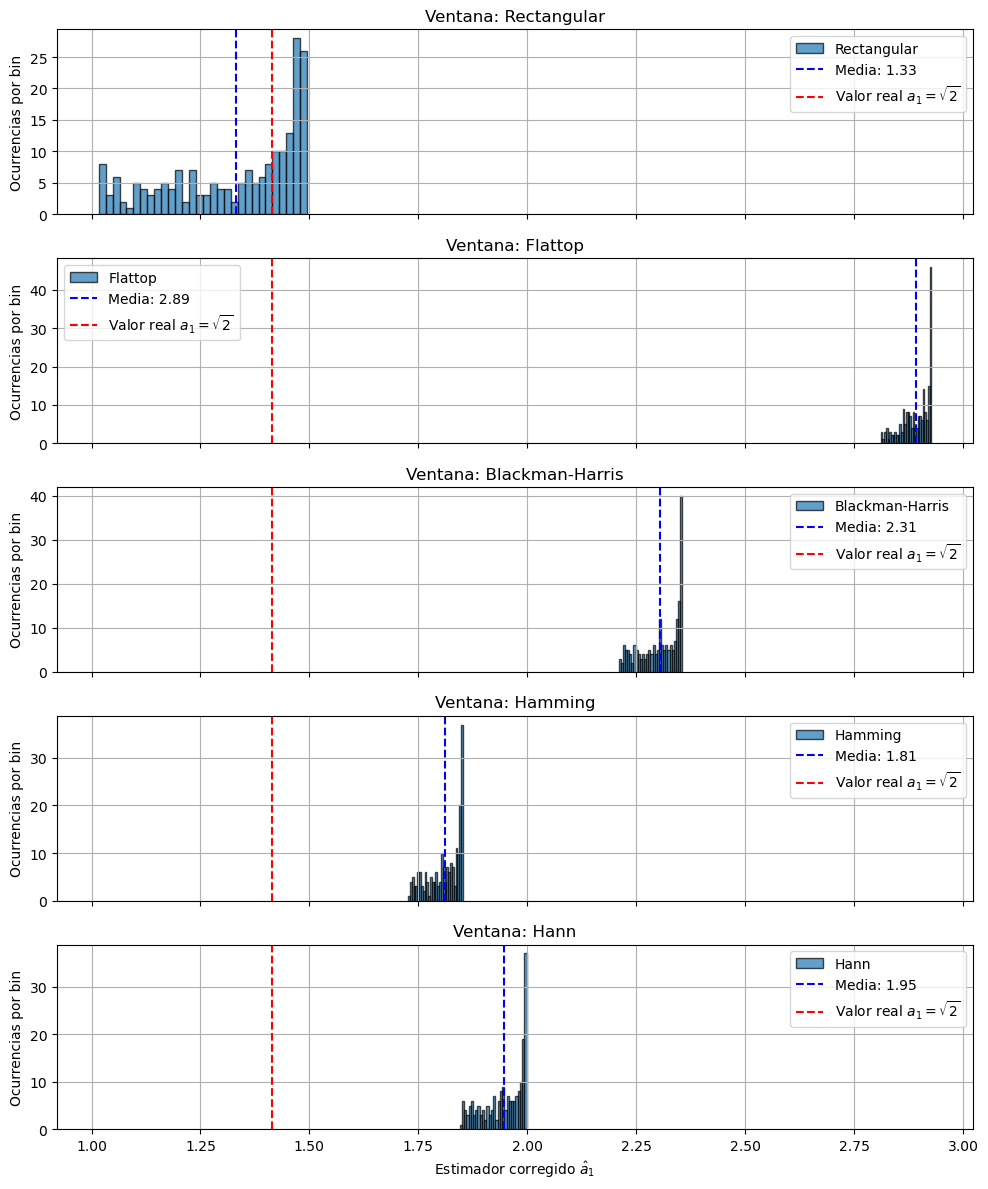

In [8]:
#%%Estimador amplitud corregido
 
estimadores_a1_corr = {}              # Diccionario para almacenar los resultados

for nombre, matriz_fft in ventanas.items():
    # Tomo el módulo del espectro evaluado en Omega_0 para cada señal (todas las columnas)
    a1_corr = (
        np.abs(matriz_fft[idx_Omega0 - 1, :]) +
        np.abs(matriz_fft[idx_Omega0,     :]) +
        np.abs(matriz_fft[idx_Omega0 + 1, :]) 
    )
    estimadores_a1_corr[nombre] = a1_corr

resultados_a1_corr = {} #creo dict para almacenar resultados

for nombre, valores in estimadores_a1_corr.items():
    media = np.mean(valores)
    sesgo = media - a1_real
    varianza = np.var(valores)
    mse = varianza + sesgo**2
    resultados_a1_corr[nombre] = {
        'Sesgo': sesgo,
        'Varianza': varianza,
        'MSE': mse
    }
    
    #%% Visualización del estimador de amplitud corregido

#--- Gráfico combinado: histograma + promedio ---
fig, axs = plt.subplots(len(estimadores_a1_corr), 1, figsize=(10, 12), sharex=True)

for ax, (nombre, valores) in zip(axs, estimadores_a1_corr.items()):
    media = np.mean(valores)
    ax.hist(valores, bins=30, alpha=0.7, label=nombre, edgecolor='black')
    ax.axvline(media, linestyle='--', color='blue', label=f"Media: {media:.2f}")
    ax.axvline(a1_real, color='r', linestyle='--', label=r"Valor real $a_1 = \sqrt{2}$")
    ax.set_title(f"Ventana: {nombre}")
    ax.set_ylabel("Ocurrencias por bin")
    ax.grid(True)
    ax.legend()

axs[-1].set_xlabel("Estimador corregido $\hat{{a}}_1$")
plt.tight_layout()
plt.show()

### Resultados del estimador corregido de amplitud

$\textbf{Tabla: Sesgo y Varianza del estimador corregido } \hat{a}_{1{\text{.corr}}}$

\begin{array}{|c|c|c|}
\hline
\textbf{Ventana} & \textbf{Sesgo } \hat{a}_{1{\text{.corr}}} & \textbf{Varianza } \hat{a}_{1{\text{.corr}}} \\
\hline
\text{Rectangular} & -0.082 & 0.022 \\
\text{Flattop} & 1.478 & 0.001 \\
\text{Blackman-Harris} & 0.891 & 0.002 \\
\text{Hamming} & 0.396 & 0.001 \\
\text{Hann} & 0.532 & 0.002 \\
\hline
\end{array}


### Comparación entre $\hat{a}_1$ y $\hat{a}_{1{\text{.corr}}}$

Al analizar los resultados del estimador corregido de amplitud $\hat{a}_{1{\text{.corr}}}$, que incorpora no sólo el valor del bin central sino también el de sus vecinos inmediatos, se observa un comportamiento significativamente distinto respecto al estimador original $\hat{a}_1$.

Mientras que el estimador original presentaba un sesgo negativo sistemático cercano a $-0.5$ en todas las ventanas, la versión corregida reduce considerablemente dicho sesgo, e incluso en algunas ventanas (como Blackman-Harris y Hamming) llega a tener sesgos positivos, aunque en ciertos casos mayores en magnitud. Esto indica que el estimador corregido, si bien no elimina completamente el error sistemático, logra desplazar la estimación hacia el valor real, mejorando su fidelidad en ciertos casos.

En términos de varianza, ambos estimadores presentan valores similares y muy bajos, lo cual sugiere que la dispersión de las estimaciones no se ve comprometida por la corrección implementada.

**En resumen:**

- El estimador $\hat{a}_{1{\text{.corr}}}$ logra reducir el sesgo sistemático observado en $\hat{a}_1$.
- La varianza se mantiene baja en ambas versiones, lo cual es deseable.
- La corrección es simple y no requiere modificar la cantidad de muestras.

Por lo tanto, se concluye que el uso de un estimador basado en la **suma de múltiples bins cercanos a la frecuencia central** es una estrategia efectiva para mejorar la estimación de amplitud.


## 💎 Analice el efecto del zero-padding para el estimador $\hat{\Omega}_1$

El zero-padding consiste en agregar ceros al final de una señal antes de aplicar la transformada de Fourier. Aunque esto no mejora la resolución espectral efectiva (es decir, no permite distinguir frecuencias más cercanas que las separadas por el bin de la DFT), sí permite una mejor interpolación del espectro ya que densifica los puntos de evaluación de la FFT. Como consecuencia, se puede estimar con más precisión la frecuencia real de un componente cuando esta cae entre bins.
A continuación se presenta se aplica zero-padding a las señales previamente generadas, multiplicadas por las diferentes ventanas temporales. Para visualizar como se módifica $\hat{\Omega}_1$ , manteniendo fija la cantidad de muestras y el SNR. 

<>:73: SyntaxWarning: invalid escape sequence '\h'
<>:73: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_6152/4014401712.py:73: SyntaxWarning: invalid escape sequence '\h'
  axs[-1].set_xlabel("Estimador corregido $\hat{{\omega}}_1$ (zero-padding)")


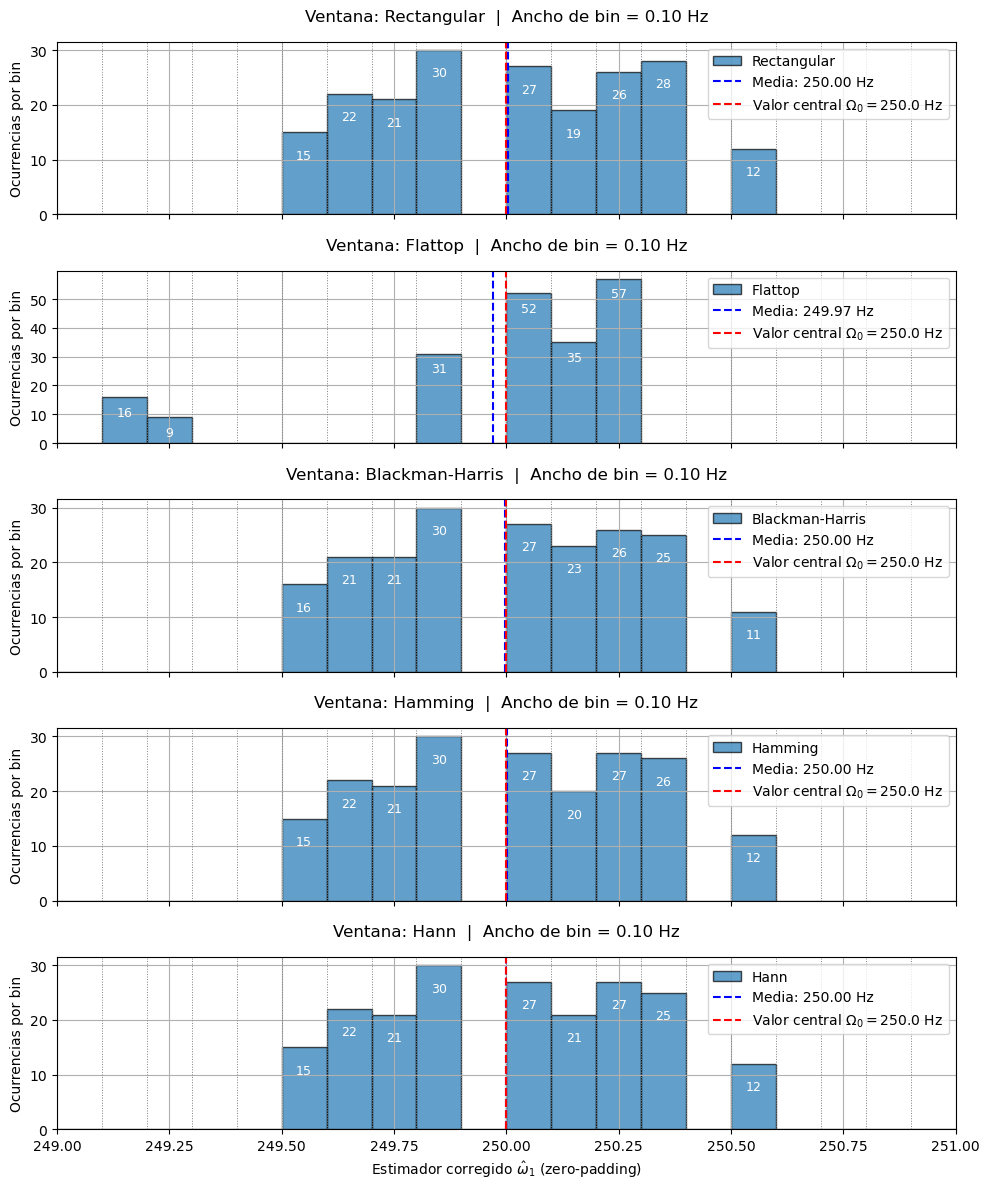

In [12]:
#%% Estimador de frecuencia con zero-padding (corregido)

M = 8000  # Longitud tras padding
df_zp = fs / M
frec_zp = np.fft.fftshift(np.fft.fftfreq(M, d=ts))

estimadores_frec_zp = {}

for nombre, ventana in zip(
    ['Rectangular', 'Flattop', 'Blackman-Harris', 'Hamming', 'Hann'],
    [w_rect, w_flattop, w_blackmanharris, w_hamming, w_hann]
):
    señal_ventaneada = Signal * ventana
    señales_padded = np.vstack((señal_ventaneada, np.zeros((M - N, N_Test))))
    fft_padded = fft(señales_padded, axis=0)
    fft_padded = fftshift(fft_padded, axes=0)
    espectro_modulo = np.abs(fft_padded)

    mask_pos_zp = frec_zp >= 0
    frec_zp_pos = frec_zp[mask_pos_zp]

    Omega1_hat_zp = np.zeros(N_Test)
    for i in range(N_Test):
        id_max = np.argmax(espectro_modulo[mask_pos_zp, i])
        Omega1_hat_zp[i] = frec_zp_pos[id_max]

    estimadores_frec_zp[nombre] = Omega1_hat_zp

# Métricas
resultados_frec_zp = {}
Omega_1_flat = Omega_1.flatten()

for nombre, valores in estimadores_frec_zp.items():
    diferencias = valores - Omega_1_flat
    sesgo = np.mean(diferencias)
    varianza = np.mean((diferencias - sesgo)**2)
    mse = varianza + sesgo**2
    resultados_frec_zp[nombre] = {
        'Sesgo': sesgo,
        'Varianza': varianza,
        'MSE': mse
    }

# Visualización
x_min = 249
x_max = 251
ancho_bin = 0.10
bins_comunes = np.arange(x_min, x_max + ancho_bin, ancho_bin)

fig, axs = plt.subplots(len(estimadores_frec_zp), 1, figsize=(10, 12), sharex=True)

for ax, (nombre, valores) in zip(axs, estimadores_frec_zp.items()):
    n, bins, patches = ax.hist(valores, bins=bins_comunes, alpha=0.7, label=nombre, edgecolor='black')
    media = np.mean(valores)

    for bin_edge in bins:
        ax.axvline(bin_edge, color='gray', linestyle=':', linewidth=0.7)

    ax.axvline(media, linestyle='--', color='blue', label=f"Media: {media:.2f} Hz")
    ax.axvline(Omega_0, color='r', linestyle='--', label=rf"Valor central $\Omega_0 = {Omega_0:.1f}$ Hz")

    for count, patch in zip(n, patches):
        if count > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            ax.text(x, y - 3, f"{int(count)}", ha='center', va='top', fontsize=9, color='white')

    ax.set_title(f"Ventana: {nombre}  |  Ancho de bin = {ancho_bin:.2f} Hz", pad=15)
    ax.set_ylabel("Ocurrencias por bin")
    ax.grid(True)
    ax.legend()

axs[-1].set_xlabel("Estimador corregido $\hat{{\omega}}_1$ (zero-padding)")
plt.xlim(x_min, x_max)
plt.tight_layout()
plt.show()

Para facilitar la comapartiva visual se presentan la gráfica de ocurrencias por rango de frecuencias original del estimador original con el estimador con el efecto zero-padding

<table style="width:100%">
  <tr>
    <td style="text-align: center; vertical-align: top;">
      <img src="./w1.png" style="width:600px; height:500px;">
    </td>
    <td style="text-align: center; vertical-align: top;">
      <img src="./w1_zp.png" style="width:600px; height:500px;">
    </td>
  </tr>
  <tr>
    <td style="text-align: center;"><em>Figura 3a:</em> Estimador $\hat{\omega}_1$</td>
    <td style="text-align: center;"><em>Figura 3b:</em> Estimador $\hat{\omega}_{1.zp}$</td>
  </tr>
</table>

Se observó que al aplicar zero-padding a las señales antes de la FFT, el estimador de frecuencia deja de colapsar siempre en un mismo valor y comienza a mostrar variabilidad acorde a las pequeñas diferencias entre señales. Esto confirma que el efecto observado previamente se debía a la resolución limitada de la DFT. El zero-padding no cambia la información contenida en la señal, pero permite detectar con más precisión la ubicación del pico espectral, lo que lo convierte en una técnica simple pero efectiva para mejorar estimadores basados en el máximo del espectro.